# Housing price prediction

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [259]:
df = pd.read_csv(r'C:\Users\Lenovo\Documents\_Datasets\Price_prediction\Housing.csv')

In [260]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 1. EDA

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [262]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [263]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [264]:
df.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [265]:
# Getting the name of the columns for categorical variables
categorical_columns = df.describe(include='object').columns

In [266]:
#Veryfing unique values for categorical variables
for column_name in categorical_columns:
    print(df[column_name].value_counts(),'\n')

mainroad
yes    468
no      77
Name: count, dtype: int64 

guestroom
no     448
yes     97
Name: count, dtype: int64 

basement
no     354
yes    191
Name: count, dtype: int64 

hotwaterheating
no     520
yes     25
Name: count, dtype: int64 

airconditioning
no     373
yes    172
Name: count, dtype: int64 

prefarea
no     417
yes    128
Name: count, dtype: int64 

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64 



In [267]:
#Converting price values into M USD
df['price_millions'] = df['price'] / 1e6

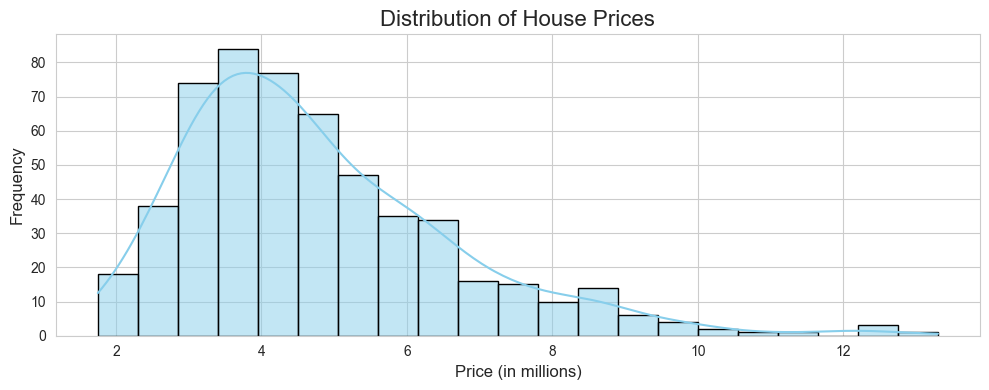

In [268]:
# Visualizing price
plt.figure(figsize=(10, 4))
sns.histplot(df['price_millions'], kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price (in millions)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

### Categorical variables distributions

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22756\3270529146.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


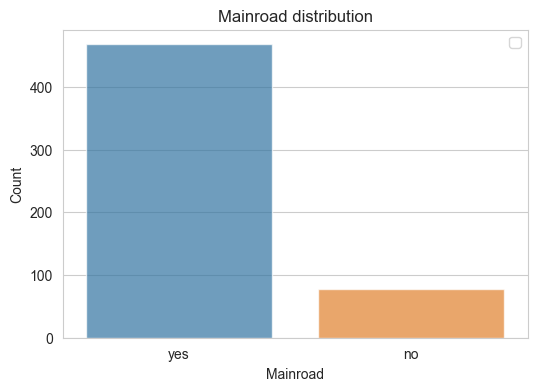

In [269]:
# Visualizing mainroad distribution
sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x = df['mainroad'], hue= df['mainroad'], alpha = 0.7)

plt.title('Mainroad distribution')
plt.xlabel("Mainroad")
plt.ylabel("Count")
plt.legend()

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22756\3737433801.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


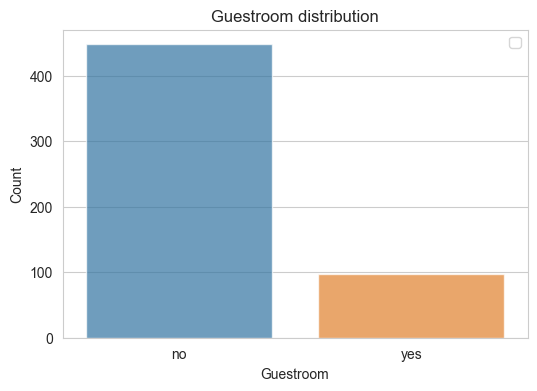

In [270]:
# Visualizing guestroom distribution

plt.figure(figsize=(6, 4))
sns.countplot(x = df['guestroom'], hue= df['guestroom'], alpha = 0.7)

plt.title('Guestroom distribution')
plt.xlabel("Guestroom")
plt.ylabel("Count")
plt.legend()

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22756\2557151596.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


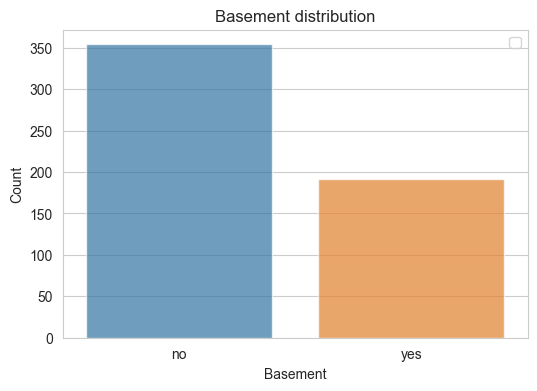

In [271]:
# Visualizing basement distribution

plt.figure(figsize=(6, 4))
sns.countplot(x = df['basement'], hue= df['basement'], alpha = 0.7)

plt.title('Basement distribution')
plt.xlabel("Basement")
plt.ylabel("Count")
plt.legend()

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22756\3886759038.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


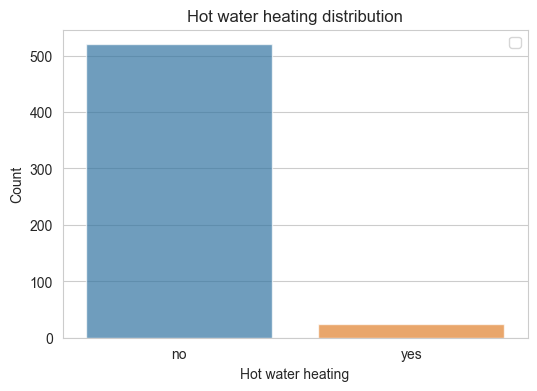

In [272]:
# Visualizing Hot water heating distribution

plt.figure(figsize=(6, 4))
sns.countplot(x = df['hotwaterheating'], hue= df['hotwaterheating'], alpha = 0.7)

plt.title('Hot water heating distribution')
plt.xlabel("Hot water heating")
plt.ylabel("Count")
plt.legend()

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22756\561636090.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


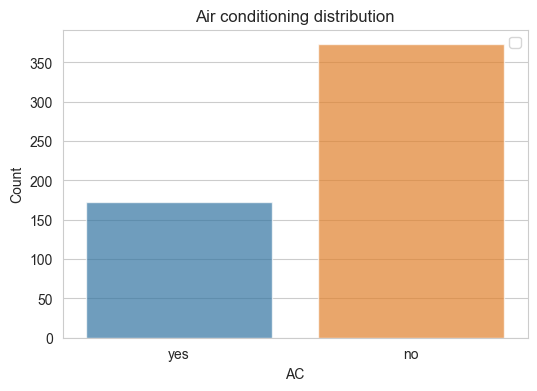

In [273]:
# Visualizing Air conditioning distribution

plt.figure(figsize=(6, 4))
sns.countplot(x = df['airconditioning'], hue= df['airconditioning'], alpha = 0.7)

plt.title('Air conditioning distribution')
plt.xlabel("AC")
plt.ylabel("Count")
plt.legend()

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22756\3417107120.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


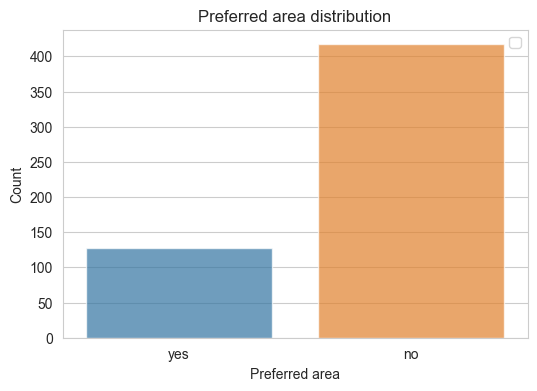

In [274]:
# Visualizing Preferred area distribution

plt.figure(figsize=(6, 4))
sns.countplot(x = df['prefarea'], hue= df['prefarea'], alpha = 0.7)

plt.title('Preferred area distribution')
plt.xlabel("Preferred area")
plt.ylabel("Count")
plt.legend()

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22756\1021351279.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


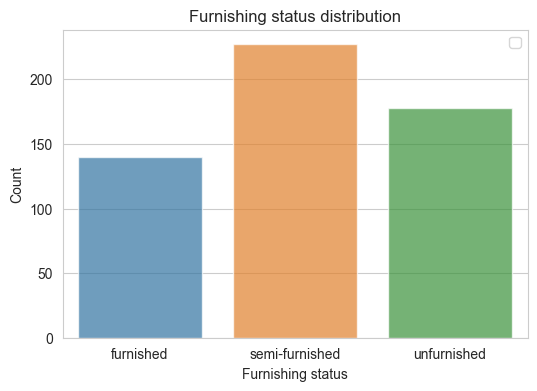

In [275]:
# Visualizing Furnishing status distribution

plt.figure(figsize=(6, 4))
sns.countplot(x = df['furnishingstatus'], hue= df['furnishingstatus'], alpha = 0.7)

plt.title('Furnishing status distribution')
plt.xlabel("Furnishing status")
plt.ylabel("Count")
plt.legend()

plt.show()

### Numeric variables distributions

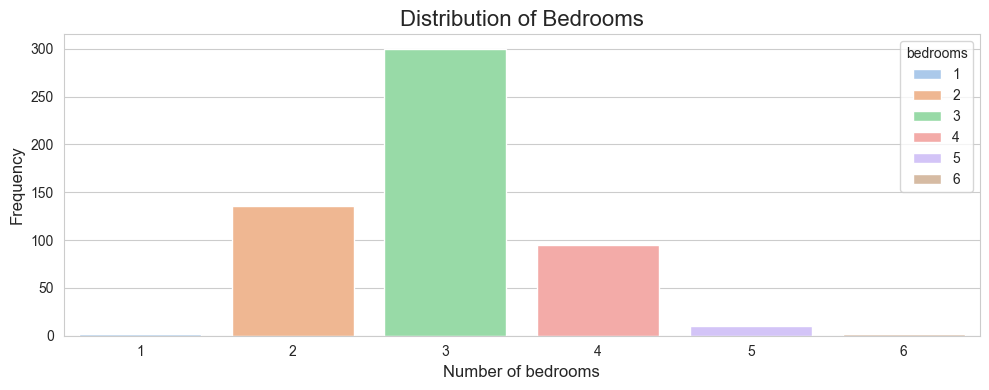

In [276]:
# Distribution of bedrooms
plt.figure(figsize=(10, 4))
sns.countplot(x=df['bedrooms'], hue=df['bedrooms'], palette='pastel', alpha=1)

plt.title('Distribution of Bedrooms', fontsize=16)
plt.xlabel('Number of bedrooms', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

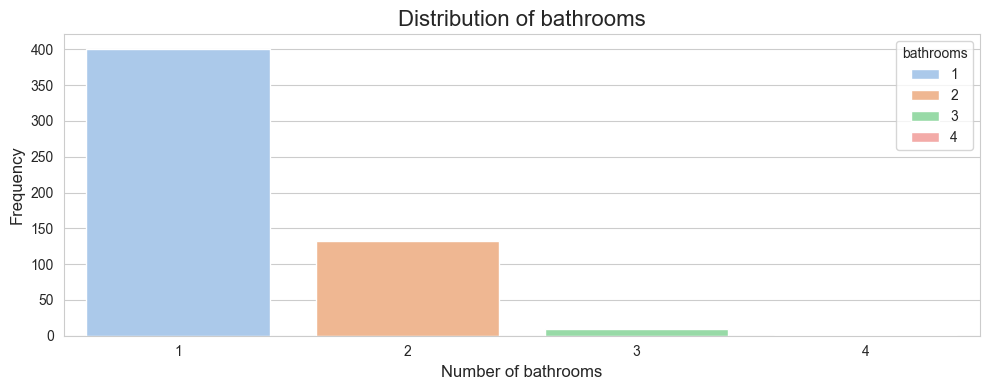

In [277]:
# Distribution of bathrooms
plt.figure(figsize=(10, 4))
sns.countplot(x=df['bathrooms'], hue=df['bathrooms'], palette='pastel', alpha=1)

plt.title('Distribution of bathrooms', fontsize=16)
plt.xlabel('Number of bathrooms', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

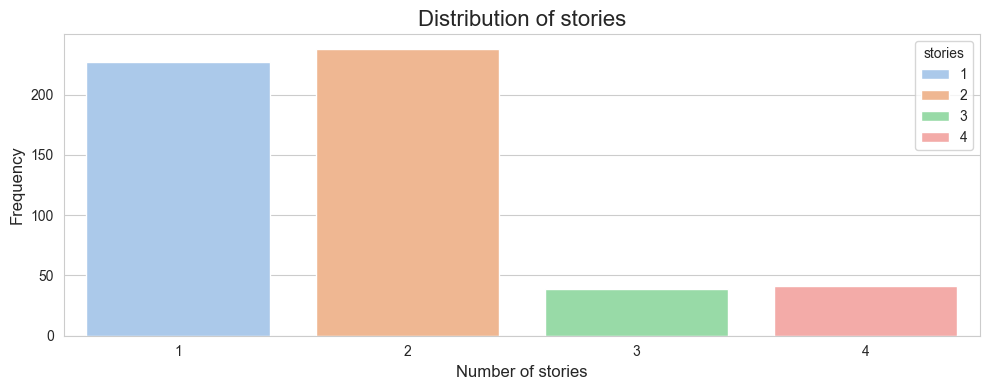

In [278]:
# Distribution of stories
plt.figure(figsize=(10, 4))
sns.countplot(x=df['stories'], hue=df['stories'], palette='pastel', alpha=1)

plt.title('Distribution of stories', fontsize=16)
plt.xlabel('Number of stories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

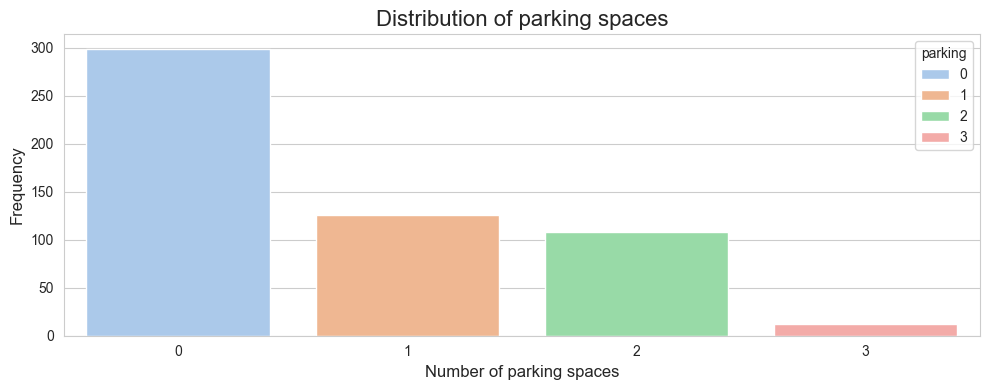

In [279]:
# Distribution of parking spaces
plt.figure(figsize=(10, 4))
sns.countplot(x=df['parking'], hue=df['parking'], palette='pastel', alpha=1)

plt.title('Distribution of parking spaces', fontsize=16)
plt.xlabel('Number of parking spaces', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

Analyzing Price and Area

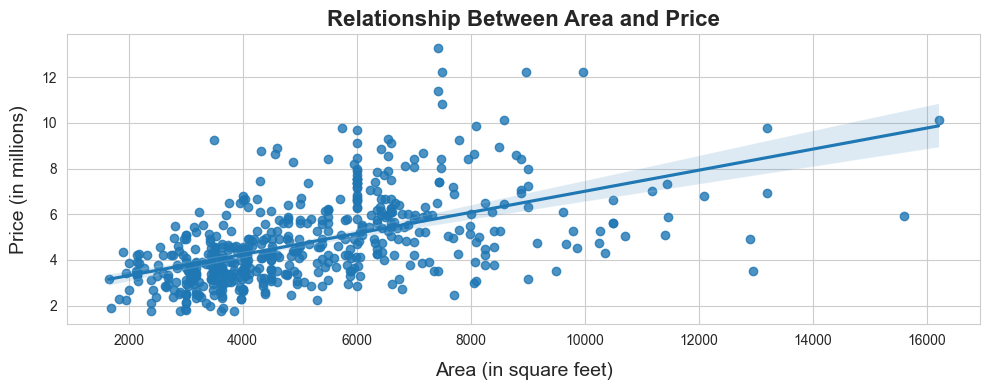

In [280]:
# Distribution of parking spaces
plt.figure(figsize=(10, 4))

sns.regplot(x=df['area'], y=df['price_millions'], scatter= True)
plt.title("Relationship Between Area and Price", fontsize=16, fontweight='bold')
plt.xlabel("Area (in square feet)", fontsize=14, labelpad=10)
plt.ylabel("Price (in millions)", fontsize=14, labelpad=10)

plt.tight_layout()
plt.show()

### Analyzing price vs numeric variables

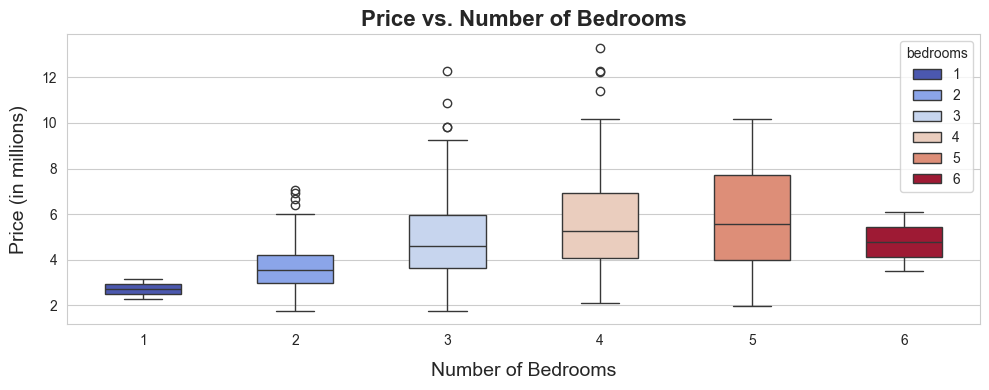

In [281]:
plt.figure(figsize=(10, 4))

sns.boxplot(x=df['bedrooms'], y=df['price_millions'], hue=df['bedrooms'], dodge=False, width=0.5, palette='coolwarm')

plt.title("Price vs. Number of Bedrooms", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=14, labelpad=10)
plt.ylabel("Price (in millions)", fontsize=14, labelpad=10)

plt.tight_layout()
plt.show()

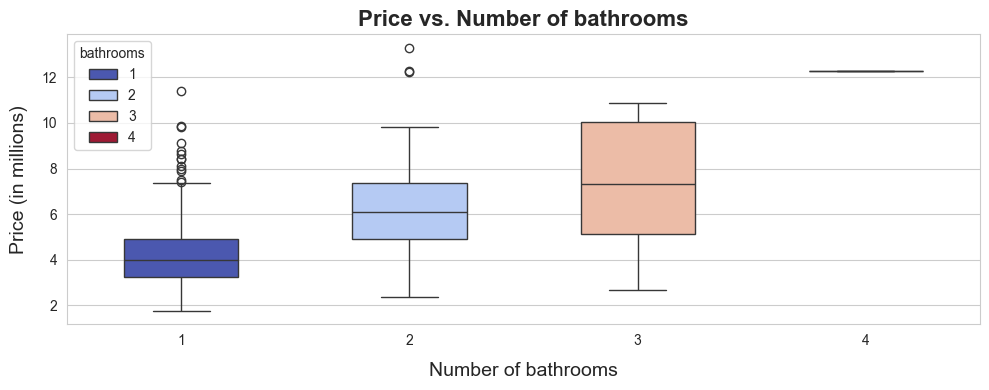

In [282]:
plt.figure(figsize=(10, 4))

sns.boxplot(x=df['bathrooms'], y=df['price_millions'], hue=df['bathrooms'], dodge=False, width=0.5, palette='coolwarm')

plt.title("Price vs. Number of bathrooms", fontsize=16, fontweight='bold')
plt.xlabel("Number of bathrooms", fontsize=14, labelpad=10)
plt.ylabel("Price (in millions)", fontsize=14, labelpad=10)

plt.tight_layout()
plt.show()

In [283]:
encoder = LabelEncoder()

In [284]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_millions
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13.300
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12.250
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12.250
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12.215
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11.410


In [285]:
categorical_columns.values

array(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'], dtype=object)

In [286]:
# Converting categorical columns values into numbers (Label encoding)
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])

In [287]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_millions
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,13.300
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,12.250
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,12.250
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,12.215
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,11.410


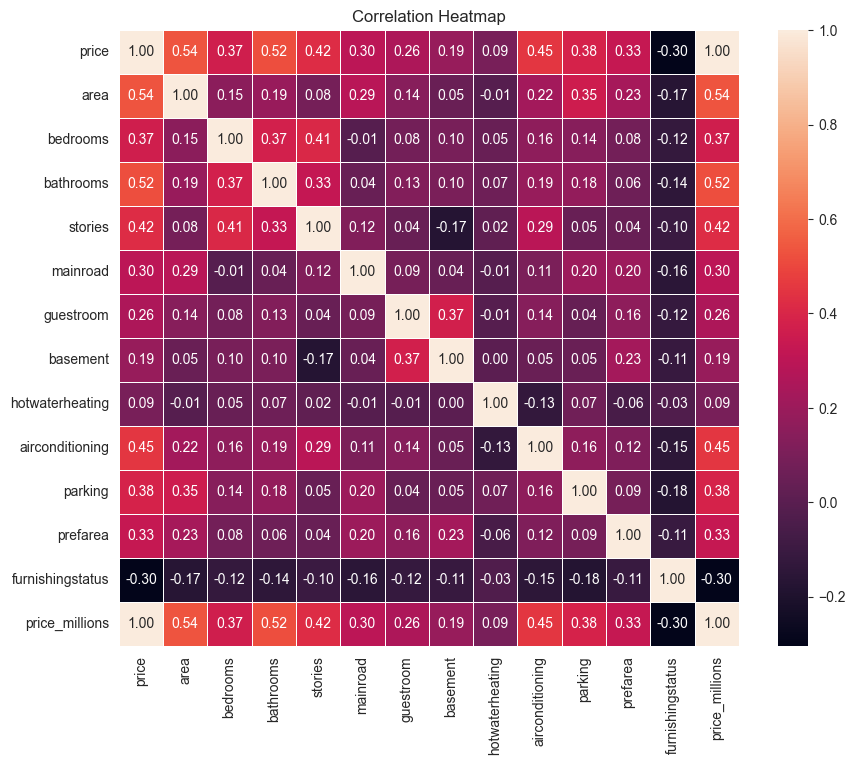

In [288]:
# Correlation heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

This heatmap indicates that there is not a significant multicollinearity problem, as correlations between the independent variables are generally low.

## 2. Model training

In [289]:
# Selecting training and target variables

X = df.drop(columns=['price', 'price_millions'], axis=1)
y = df['price_millions']

In [290]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [291]:
scaler = MinMaxScaler()

X_original = X
X = scaler.fit_transform(X)

# y = scaler.fit_transform(y.values.reshape(-1, 1))
y =  y.values.reshape(-1, 1)

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Linear regression

In [293]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)

LinearRegression()

In [294]:
y_pred_lr = ln_model.predict(X_test)

ln_r2 = r2_score(y_test, y_pred_lr)
ln_mae = mean_absolute_error(y_test, y_pred_lr)
ln_mse = mean_squared_error(y_test, y_pred_lr)
ln_rmse = np.sqrt(ln_mse)

print("Linear Regression Metrics:")
print("R² Score:", ln_r2)
print("Mean Absolute Error (MAE):", ln_mae)
print("Mean Squared Error (MSE):", ln_mse)
print("Root Mean Squared Error (RMSE):", ln_rmse)

Linear Regression Metrics:
R² Score: 0.7246848761009661
Mean Absolute Error (MAE): 0.7177657362982411
Mean Squared Error (MSE): 0.9114083568009447
Root Mean Squared Error (RMSE): 0.9546770955673676


### Decission tree

In [295]:
dt_model = DecisionTreeRegressor(random_state=50)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=50)

In [296]:
y_pred = dt_model.predict(X_test)

dt_r2 = r2_score(y_test, y_pred)
dt_mae = mean_absolute_error(y_test, y_pred)
dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = np.sqrt(dt_mse)

print("Decision Tree Metrics:")
print("R² Score:", dt_r2)
print("Mean Absolute Error (MAE):", dt_mae)
print("Mean Squared Error (MSE):", dt_mse)
print("Root Mean Squared Error (RMSE):", dt_rmse)

Decision Tree Metrics:
R² Score: 0.47925723108318474
Mean Absolute Error (MAE): 0.9653577981651376
Mean Squared Error (MSE): 1.7238766422018348
Root Mean Squared Error (RMSE): 1.3129648290041263


### Hyperparameter tuning

#### Random forest

In [297]:
# Hyper tuning the model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=50),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train.ravel())

best_rf_model = grid_search.best_estimator_
print("Best Hyperparameters for Random Forest:", grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [298]:
y_pred = best_rf_model.predict(X_test)

In [299]:
rf_r2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)

print("\nTuned Random Forest Metrics:")
print("R² Score:", rf_r2)
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)


Tuned Random Forest Metrics:
R² Score: 0.7204543748562218
Mean Absolute Error (MAE): 0.6724561137253184
Mean Squared Error (MSE): 0.9254130875738561
Root Mean Squared Error (RMSE): 0.9619839331162741


In [300]:
feature_importances_rf = best_rf_model.feature_importances_

importance_df = pd.DataFrame({
    'feature': X_original.columns,
    'importance': feature_importances_rf
}).sort_values('importance', ascending=False)

In [301]:
importance_df

,feature,importance
0,area,0.304673
2,bathrooms,0.140908
9,parking,0.102818
3,stories,0.096335
8,airconditioning,0.077267
1,bedrooms,0.065159
11,furnishingstatus,0.063729
10,prefarea,0.039102
6,basement,0.038828
5,guestroom,0.027646


#### XG Boost

In [302]:
# Hyper tuning the model
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=50),
    param_distributions=param_distributions,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=50,
    n_jobs=-1
)

random_search.fit(X_train, y_train.ravel())


best_gb_model = random_search.best_estimator_
print("Best Hyperparameters for Gradient Boosting:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for Gradient Boosting: {'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 7, 'learning_rate': 0.01}


In [303]:
y_pred = best_gb_model.predict(X_test)

gb_r2 = r2_score(y_test, y_pred)
gb_mae = mean_absolute_error(y_test, y_pred)
gb_mse = mean_squared_error(y_test, y_pred)
gb_rmse = np.sqrt(gb_mse)

print("Optimised Gradient Boosting Metrics:")
print("R² Score:", gb_r2)
print("Mean Absolute Error (MAE):", gb_mae)
print("Mean Squared Error (MSE):", gb_mse)
print("Root Mean Squared Error (RMSE):", gb_rmse)


Optimised Gradient Boosting Metrics:
R² Score: 0.7104509734413846
Mean Absolute Error (MAE): 0.685630405464327
Mean Squared Error (MSE): 0.9585285354896801
Root Mean Squared Error (RMSE): 0.9790447055623559


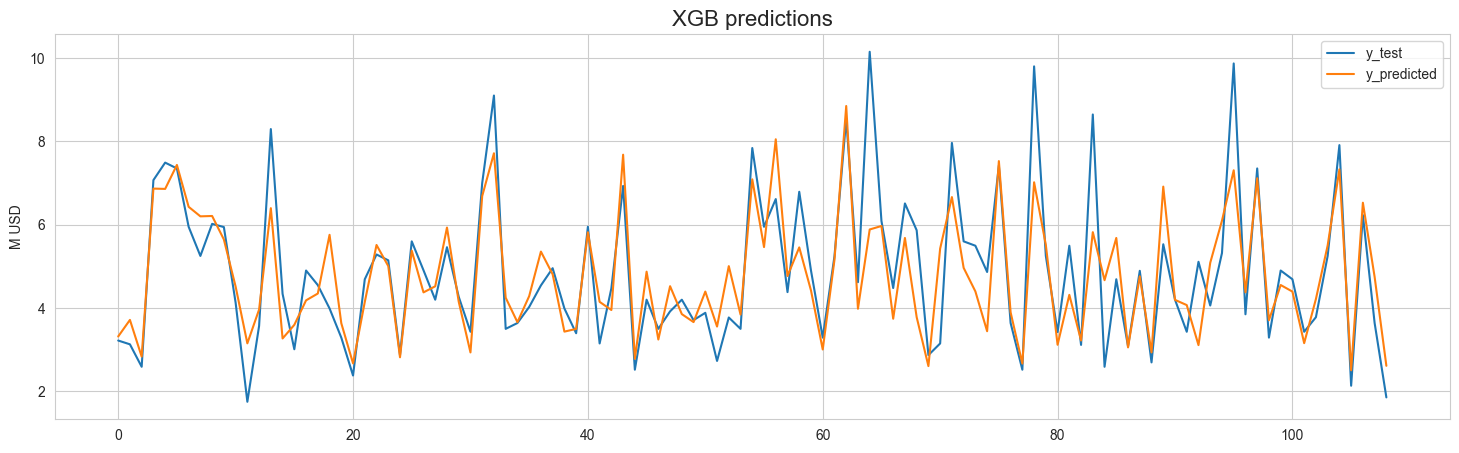

In [304]:
plt.figure(figsize = (18,5))
plt.plot(y_test, label = 'y_test')
plt.plot(y_pred, label = 'y_predicted')

plt.title('XGB predictions', fontsize=16)
plt.ylabel('M USD')
plt.legend()
plt.show()

In [305]:
feature_importances = best_gb_model.feature_importances_

importance_df = pd.DataFrame({
    'feature': X_original.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

In [306]:
importance_df

,feature,importance
0,area,0.441458
2,bathrooms,0.162049
9,parking,0.081469
8,airconditioning,0.073129
3,stories,0.068602
11,furnishingstatus,0.047143
10,prefarea,0.034289
6,basement,0.030657
1,bedrooms,0.027000
7,hotwaterheating,0.014089


## Conclusions

The main goal of this project was to train a model for predicting a house price depending on certain variables. To achieve this, three different models were explored: 
* Linear regression
* Decission tree
* Random forest (with hyperparameter tunning)
* XGBoost (with hyperparameter tunning)

In the EDA phase, it was found the data was already cleaned, there were no missing values, the categorical variables were consistent, so, no clenaing techinques were needed.

After visualizing the correlation heatmap, they weren't found any high correlation values between the independent variables, which indicated there was not a significant multicollinearity problem.

The results shown by the Random Forest model after tuning the hyperparameters, were significantly higher than the linear regression and decission tree predictors, and had a slighty better performance than XGBoost. 

The key evaluation metrics for the Random Forest model were:
* R2 - 0.7204
* MAE - 0.6724 (in MUSD, so it would be a 672 kUSD error)
* RMSE - 0.9619 (in MUSD, so it would be a 961 kUSD error)

While the R2 for XGBoost was 0.7104.

The analysis of feature importances provided by the Random Forest model, indicates that 
there is one main predictor variable that affect the house price, which is the area, with an importance of 30.5%, then the second most important feature is "Number of bathrooms" with an importance of 14.1%; the rest of the variables values are below 9%.

These findings, would suggest that the most influential variable for the house prices is the area of the property (as it would be expected). However, the rest of the predictor variables have a very low impact on the price. 

The coefficient of determination indicates that approximately 72% of the variability in house prices can be explained by the obtained model, suggesting a reasonably good fit to the data.Considering that the real state market could be very complex and influenced by many other factors, this could be a good starting point to estimate a price of a house.

For further investigation and improvement of the model, there could be different variables that could be included in the analysis for the prediction, such as: the location of the property, age of the property, proximity to certain "zones" from the city, etc.

Finally, this model is a good estimation of the house prices, where the area of the property and the number of bathrooms were identified as the most influential predictors through a Ranfom Forest model with hyperparameter tunning. These result provide a good basis for future analysis of properties considering more variables that could help to obtain a more accurate value of the price of a house.


